In [1]:
import tensorflow as tf

import os
import math
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential

from IPython.display import display
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
SIZEx=256
SIZEy=256
high_img = []
path = './image/Data/HR/'
files = sorted(os.listdir(path))

for i in files:       
        img = cv2.imread(path + '/'+i)
        # open cv reads images in BGR format so we have to convert it to RGB
        #resizing image
        img = cv2.resize(img, (SIZEx, SIZEy))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))


low_img = []
path = './image/Data/LR/'
files = sorted(os.listdir(path))
for i in files:
     
        img = cv2.imread(path + '/'+i)
        #resizing image
        img = cv2.resize(img, (SIZEx, SIZEy))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

In [3]:
SIZEx=256
SIZEy=256

In [4]:
len(low_img)

955

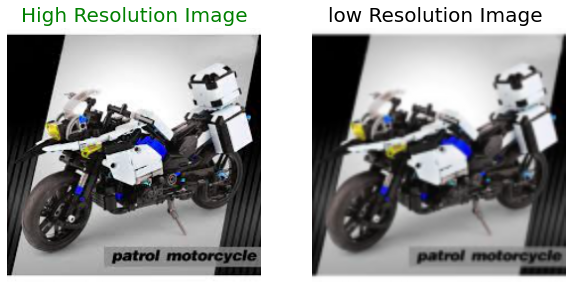

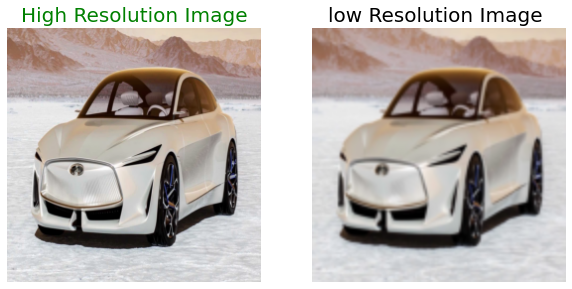

In [5]:
for i in range(2):
    a = np.random.randint(0,100)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Image', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [6]:
train_high_image =np.array(high_img)
train_low_image =np.array(low_img)

validation_high_image =[]
validation_low_image = []
path = './image/Data/H/'
files = sorted(os.listdir(path))

for i in files:       
        img = cv2.imread(path + '/'+i)
        # open cv reads images in BGR format so we have to convert it to RGB
        #resizing image
        img = cv2.resize(img, (SIZEx, SIZEy))
        img = img.astype('float32') / 255.0
        validation_high_image.append(img_to_array(img))


low_img = []
path = './image/Data/L/'
files = sorted(os.listdir(path))
for i in files:
     
        img = cv2.imread(path + '/'+i)
        #resizing image
        img = cv2.resize(img, (SIZEx, SIZEy))
        img = img.astype('float32') / 255.0
        validation_low_image.append(img_to_array(img))
validation_high_image=np.array(validation_high_image)
validation_low_image=np.array(validation_low_image)

# test_high_image = np.array( high_img[170:])
# test_low_image = np.array( low_img[170:])

print("Shape of training images:",train_low_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (955, 256, 256, 3)
Shape of validation images: (191, 256, 256, 3)


In [7]:
def srcnn():
    
    inputs = keras.layers.Input(shape=(SIZEy, SIZEx, 3))
    
    cnn = keras.layers.Conv2D(64, 9, padding='same', activation='relu')(inputs)
    
    cnn = keras.layers.Conv2D(32, 1, padding='same', activation='relu')(cnn)
   
    outputs = keras.layers.Conv2D(3, 5, padding='same',activation='relu')(inputs)
    
   
    model = keras.models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=tf.optimizers.Adam(3e-3), loss=tf.losses.mse, metrics=['accuracy'])
    return model

In [8]:
# f1 = 9
# f2_1 = 1
# f2_2 = 3
# f2_3 = 5
# f3 = 5

# n1 = 64
# n2 = 32

# height=32 
# width=32 
# channels=3
# batch_size=128
# def create_model( ):
      
#         init=keras.layers.Input(shape=(SIZEy, SIZEx, 3))
#         x = Convolution2D(n1, (f1,f1), activation='relu', padding='same', name='level1')(init)

#         x1 = Convolution2D(n2, (f2_1,f2_1), activation='relu', padding='same', name='lavel1_1')(x)

#         out = Convolution2D(channels, (f3, f3), activation='relu', padding='same', name='output')(x)

#         model = Model(init, out)
#         model.compile(optimizer=tf.optimizers.Adam(1e-3), loss='mse', metrics=[PSNRLoss])
# #         return model
# def PSNRLoss(y_true, y_pred):
#     """
#     PSNR is Peek Signal to Noise Ratio, which is similar to mean squared error.
#     It can be calculated as
#     PSNR = 20 * log10(MAXp) - 10 * log10(MSE)
#     When providing an unscaled input, MAXp = 255. Therefore 20 * log10(255)== 48.1308036087.
#     However, since we are scaling our input, MAXp = 1. Therefore 20 * log10(1) = 0.
#     Thus we remove that component completely and only compute the remaining MSE component.
#     """
#     return -10. * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.)

In [4]:
model=srcnn()

2022-06-01 13:48:10.565932: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-01 13:48:10.565990: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (EliteBook): /proc/driver/nvidia/version does not exist
2022-06-01 13:48:10.569496: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.fit(train_low_image,train_high_image, epochs=20, batch_size=5,validation_data=(validation_low_image,validation_high_image), verbose=1, shuffle=True)

Epoch 1/20
191/191 [==============================] - 49s 255ms/step - loss: 0.0016 - accuracy: 0.8373 - val_loss: 0.0042 - val_accuracy: 0.9325
Epoch 2/20
191/191 [==============================] - 30s 155ms/step - loss: 0.0015 - accuracy: 0.8824 - val_loss: 0.0041 - val_accuracy: 0.9291
Epoch 3/20
191/191 [==============================] - 44s 231ms/step - loss: 0.0016 - accuracy: 0.8881 - val_loss: 0.0042 - val_accuracy: 0.9170
Epoch 4/20
191/191 [==============================] - 31s 162ms/step - loss: 0.0015 - accuracy: 0.8909 - val_loss: 0.0041 - val_accuracy: 0.9381
Epoch 5/20
191/191 [==============================] - 37s 148ms/step - loss: 0.0017 - accuracy: 0.8528 - val_loss: 0.0043 - val_accuracy: 0.8883
Epoch 6/20
191/191 [==============================] - 30s 157ms/step - loss: 0.0015 - accuracy: 0.8624 - val_loss: 0.0041 - val_accuracy: 0.9241
Epoch 7/20
191/191 [==============================] - 34s 179ms/step - loss: 0.0015 - accuracy: 0.8890 - val_loss: 0.0041 - val_ac

In [18]:
SIZE = 256
test_high =[]
path = './image/Data/H/'
files = sorted(os.listdir(path))
for i in files:       
        img = cv2.imread(path + '/'+i)
        # open cv reads images in BGR format so we have to convert it to RGB
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        test_high.append(img_to_array(img))


test_low = []
path = './image/Data/L/'
files = sorted(os.listdir(path))
for i in files:
     
        img = cv2.imread(path + '/'+i)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        test_low.append(img_to_array(img))



In [34]:
# model.load_weights('./checkpoints/SRCNN1')
# images=model.predict(np.array(test_low[:20]))


In [35]:
# image_test=cv2.imread("./test.jpeg")
# dossier_test=[]
# image_test = cv2.resize(image_test, (SIZEx, SIZEy))
# image_test = image_test.astype('float32') / 255.0
# dossier_test.append(img_to_array(image_test))
# images=model.predict(np.array(dossier_test))
# np.array(dossier_test).shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


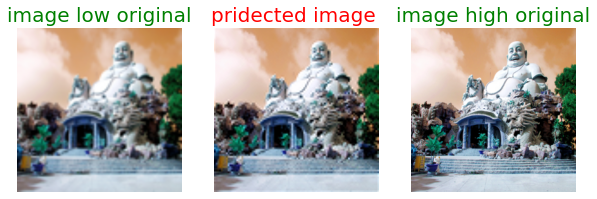

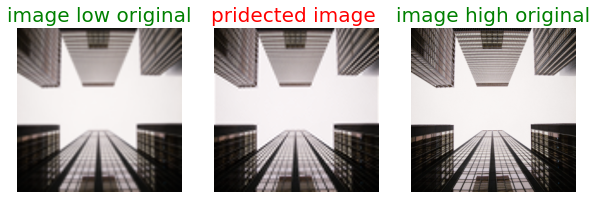

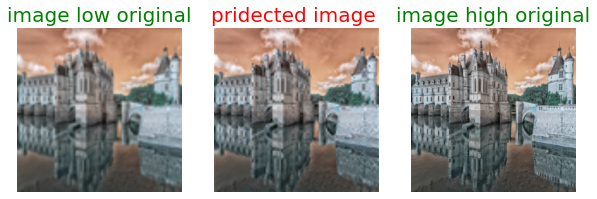

In [47]:
for i in range(3):
    a = np.random.randint(0,20)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title('image low original', color = 'green', fontsize = 20)
    plt.imshow(test_low[a])
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('pridected image ', color = 'red', fontsize = 20)
    plt.imshow(images[a])
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.title('image high original', color = 'green', fontsize = 20)
    plt.imshow(test_high[a])
    plt.axis('off')

In [43]:
model.evaluate(np.array(test_low[:10]),np.array(test_high[:10]))

1/1 [==============================] - 0s 149ms/step - loss: 0.0038 - accuracy: 0.9111


[0.00377359869889915, 0.9111129641532898]

In [38]:
# from PIL import Image
# import os
# path = './image/Data/dataset/Raw Data/low_res'
# files = os.listdir(path)
# j=100
# for i in files:  
#     img = Image.open(path + '/'+i)

#     file_out ='./image/Data/LR/'+str(j)+'.png'
#     img.save(file_out)
#     j+=1

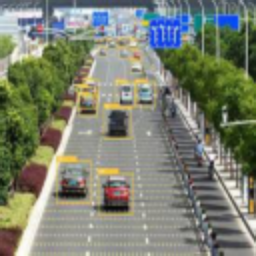

In [39]:
img

In [ ]:
# model.save("SRCNN.h5")

In [ ]:
# j=0
# for i in images:
#     a="./image/img"+str(j)+".bmp"
#     cv2.imwrite(a,i*255)
#     j+=1
    

In [ ]:
# m=srcnn()
# m.load_weights("./point")
# m.evaluate(test_low_image,test_high_image)

In [ ]:
# import numpy
# # import Image as im
# img= cv2.imread('./Data/HR/1.png', cv2.IMREAD_COLOR)
# ycbc = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)[6: -6, 6: -6, 0]


In [ ]:
def psnr(target, ref):
    # assume RGB image
    target_data = numpy.array(target, dtype=float)
    ref_data = numpy.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(numpy.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)


U-NET

In [9]:
SIZE = 256

In [29]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

def model():
    inputs = layers.Input(shape= [SIZE,SIZE,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)
    
    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)



In [22]:
model = model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_30 (Sequential)     (None, 128, 128, 12  3584        ['input_4[0][0]']                
                                8)                                                                
                                                                                                  
 sequential_31 (Sequential)     (None, 64, 64, 128)  147584      ['sequential_30[0][0]']          
                                                                                            

In [23]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

In [24]:
model.fit(train_low_image, train_high_image, epochs =50, batch_size =1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/50
955/955 [==============================] - 572s 574ms/step - loss: 0.0408 - acc: 0.7362 - val_loss: 0.0403 - val_acc: 0.8809
Epoch 2/50
955/955 [==============================] - 550s 576ms/step - loss: 0.0245 - acc: 0.8094 - val_loss: 0.0383 - val_acc: 0.8951
Epoch 3/50
955/955 [==============================] - 634s 664ms/step - loss: 0.0218 - acc: 0.8303 - val_loss: 0.0403 - val_acc: 0.8633
Epoch 4/50
955/955 [==============================] - 611s 640ms/step - loss: 0.0204 - acc: 0.8352 - val_loss: 0.0398 - val_acc: 0.8766
Epoch 5/50
955/955 [==============================] - 597s 625ms/step - loss: 0.0199 - acc: 0.8442 - val_loss: 0.0379 - val_acc: 0.8914
Epoch 6/50
955/955 [==============================] - 624s 654ms/step - loss: 0.0193 - acc: 0.8515 - val_loss: 0.0367 - val_acc: 0.9139
Epoch 7/50
955/955 [==============================] - 613s 642ms/step - loss: 0.0191 - acc: 0.8528 - val_loss: 0.0363 - val_acc: 0.9045
Epoch 8/50
955/955 [============================

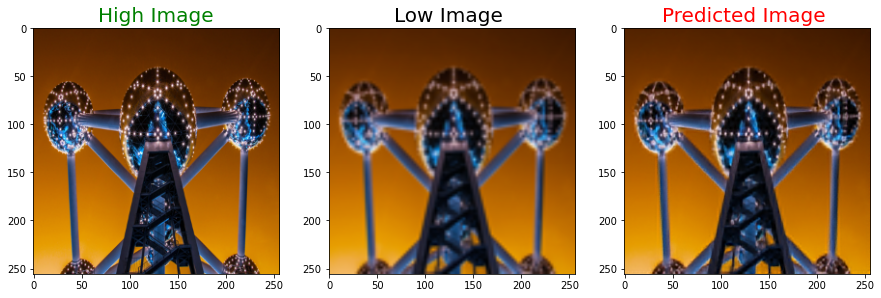

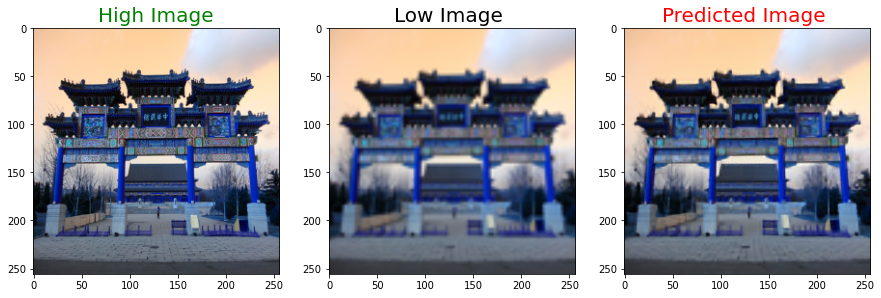

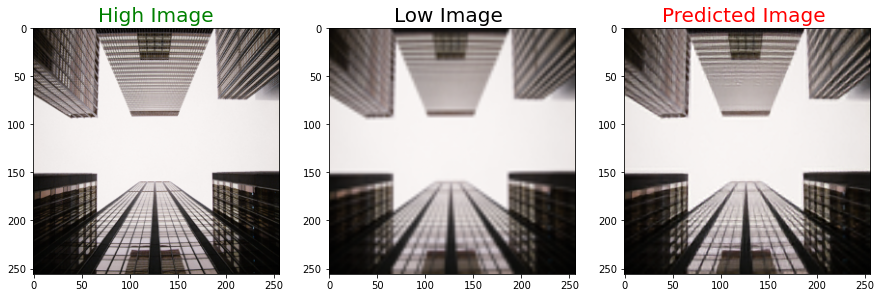

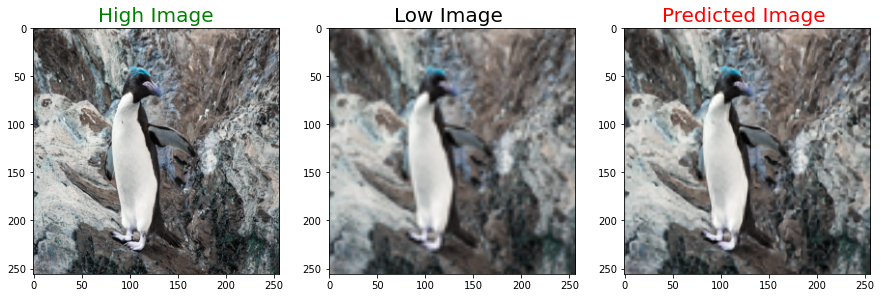

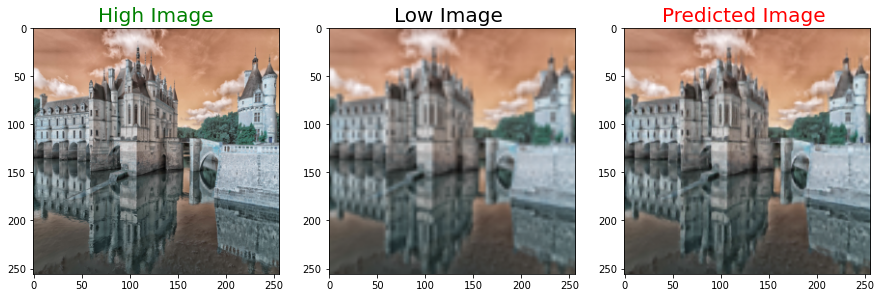

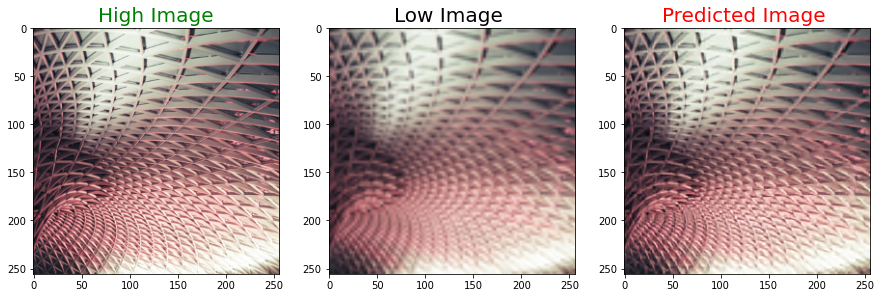

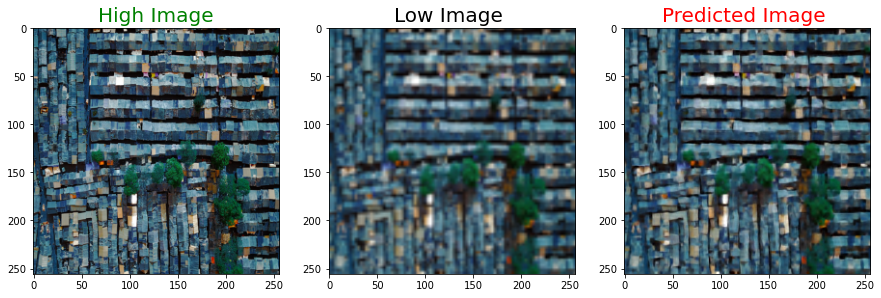

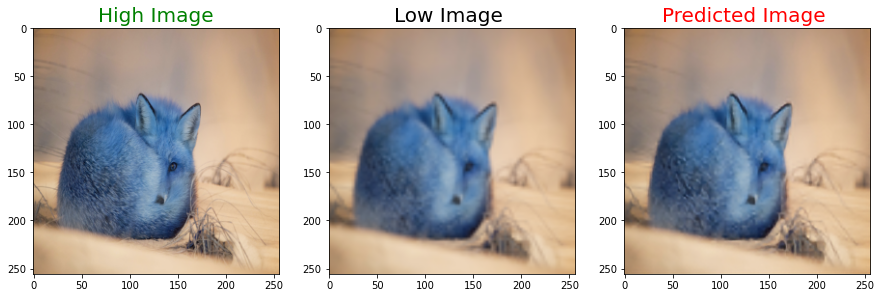

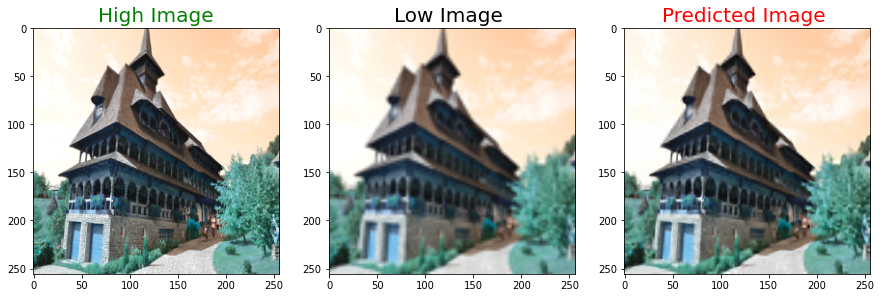

In [25]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(1,10):
    
    predicted = np.clip(model.predict(test_low[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high[i],test_low[i],predicted)

In [27]:
model.save("./saved_model/U-net.h5")

AUTOENCODEUR

In [25]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
def build_model():
    input_img = Input(shape=(256, 256, 3))
    l1 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(input_img)
    l2 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l1)

    l3 = MaxPooling2D(padding='same')(l2)
    l3 = Dropout(0.3)(l3)
    l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l3)
    l5 = Conv2D(128, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l4)

    l6 = MaxPooling2D(padding='same')(l5)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l6)
    
    l8 = UpSampling2D()(l7)

    l9 = Conv2D(128, (3, 3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(l8)
    l10 = Conv2D(128, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l9)

    l11 = add([l5, l10])
    l12 = UpSampling2D()(l11)
    l13 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l12)
    l14 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l13)

    l15 = add([l14, l2])

    decoded = Conv2D(3, (3, 3), padding='same', activation='relu', 
                     activity_regularizer=regularizers.l1(10e-10))(l15)


    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [26]:
model1=build_model()

In [27]:
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

In [ ]:
model1.fit(train_low_image, train_high_image, epochs = 20, batch_size = 8,
          validation_data = (validation_low_image,validation_high_image))

2022-06-09 00:57:03.315981: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 751042560 exceeds 10% of free system memory.


Epoch 1/20


In [11]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(0,5):
    
    predicted = np.clip(model.predict(test_low[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high[i],test_low[i],predicted)

ValueError: in user code:

    File "/home/hp/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/hp/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hp/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/hp/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/hp/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/hp/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
      • training=False
      • mask=None


In [37]:
modl=model()
modl.load_weights('./saved_model/U-net.h5')

In [38]:
im_=modl.predict(np.array(test_low[:10]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


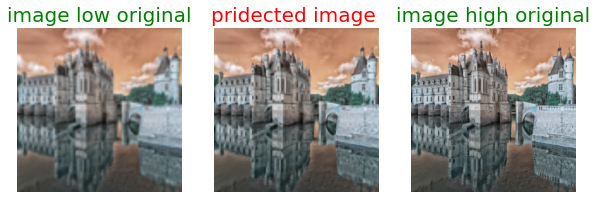

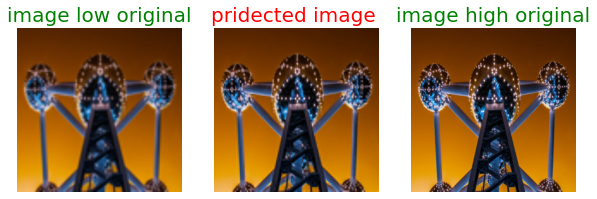

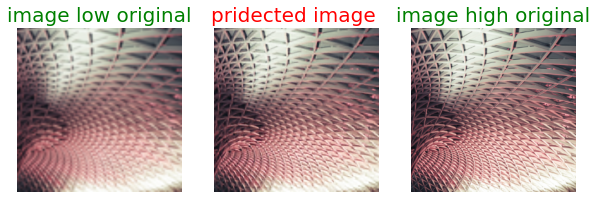

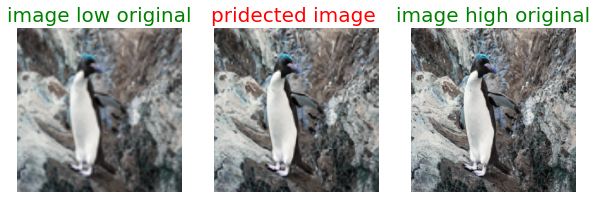

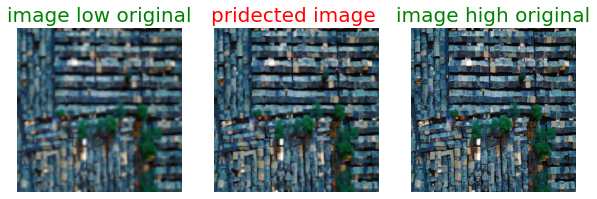

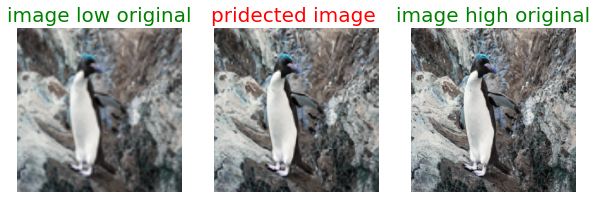

In [39]:
for i in range(6):
    a = np.random.randint(0,10)
    plt.figure(figsize=(10,10))
    plt.subplot(1,3,1)
    plt.title('image low original', color = 'green', fontsize = 20)
    plt.imshow(test_low[a])
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('pridected image ', color = 'red', fontsize = 20)
    plt.imshow(im_[a])
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.title('image high original', color = 'green', fontsize = 20)
    plt.imshow(test_high[a])
    plt.axis('off')
    